#                                             DISNEYLAND DREAMS - Analyzing Sentiments and Creating Personalized Chatbot Experiences

This project titled, “DISNEYLAND DREAMS – Analyzing Sentiments and creating Personalized Chatbot Experiences” aims in leveraging Natural Language Processing techniques to analyze customer sentiments expressed in textual data such as reviews and feedback with respect to Disneyland Park locations. 

This analysis aims to gain insights on visitor perceptions, emotions, and preferences regarding attractions and experiences at Disneyland locations in California, Paris, and Hong Kong. It can be accomplished by delving into the architecture of neural network model for understanding and predicting the user emotions from text messages.

It is an important factor when it comes to monitoring Customer Satisfaction, Brand Reputation management, Predictive Analytics on future trends and personalized customer experience.

# Exploratory Data Analysis (EDA):

We will be using this Dataset to extract some informative insights about Disneyland and draw some conclusions from Disneyland reviews 

   1. Data Collection and pre-processing
   2. Data Analysis & Visualizations

## Data Collection and pre-processing:

**Importing basic libraries**:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\priya\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Defining Disney dataset**:

In [2]:
file_path = r'C:\Users\priya\Downloads\Projectwork\DisneylandReviews.csv'

# Inorder to avoid the encoding error with the csv file, which is default UTF-8 encoding and unable to decode some byte 
# sequences in the file.To resolve this issue, use an encoding parameter 'latin1' or 'ISO-8859-1'.

disneydf = pd.read_csv(file_path,encoding='latin1')  
disneydf.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [3]:
disneydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [4]:
# To identify the number of rows and columns in a dataset
disneydf.shape

(42656, 6)

In [5]:
# Check for null values
disneydf.isnull().sum()

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64

In [6]:
# To identify the number of rows having the Review year and month as "missing" 
disneydf[disneydf.Year_Month == 'missing']

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
269,647038712,4,missing,Philippines,The first thing on our agenda when we finished...,Disneyland_HongKong
282,646466731,3,missing,Singapore,Brought mum for the first time to Disneyland w...,Disneyland_HongKong
622,620580249,3,missing,Canada,I have been to Tokyo and LA Disneyland!I also ...,Disneyland_HongKong
5347,318799221,4,missing,Australia,We pre bought tickets at the hotel (same price...,Disneyland_HongKong
5799,284745152,5,missing,Philippines,Disneyland is indeed the most magical place in...,Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


In [7]:
disneydf.Review_ID.nunique()

42636

In [8]:
# To identify the total number of duplicate entries with respect to "Review_ID"
disneydf.duplicated(subset='Review_ID').sum()

20

In [9]:
# To identify the duplicate entries with respect to "Review_ID"                    
duplicates= disneydf[disneydf.duplicated(subset=['Review_ID'], keep=False)]
duplicates

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
7858,168489234,4,2013-1,Malaysia,"Reading reviews here, I was really skeptical ...",Disneyland_HongKong
7867,168489234,4,2013-1,Malaysia,"Reading reviews here, I was really skeptical ...",Disneyland_HongKong
7939,164862064,5,2013-6,Singapore,Great atmosphere... A place for everyone in th...,Disneyland_HongKong
7940,164830205,3,2012-7,United States,"If you've visited DisneyWorld in Orlando, your...",Disneyland_HongKong
7949,164862064,5,2013-6,Singapore,Great atmosphere... A place for everyone in th...,Disneyland_HongKong
7950,164830205,3,2012-7,United States,"If you've visited DisneyWorld in Orlando, your...",Disneyland_HongKong
8814,129231609,5,2012-4,United States,Let me just start off by saying that although ...,Disneyland_HongKong
8815,129214104,3,2012-4,Malaysia,Like: Back to the time with Disney characters....,Disneyland_HongKong
8816,129207323,5,2011-9,Australia,Having never been to any Disneyland I was thri...,Disneyland_HongKong
8823,129231609,5,2012-4,United States,Let me just start off by saying that although ...,Disneyland_HongKong


In [10]:
# To drop the duplicate rows with respect to "Review_ID". 20 duplicate entries are dropped
disneydf.drop_duplicates(subset = 'Review_ID',inplace=True, keep='first')
disneydf.shape

(42636, 6)

In [11]:
#Check for Duplicates 
duplicates= disneydf[disneydf.duplicated(subset=['Review_ID'], keep=False)]
duplicates

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch


In [12]:
#Check for duplicate with respect to particular Review_ID
disneydf[disneydf.Review_ID == 168489234]

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
7858,168489234,4,2013-1,Malaysia,"Reading reviews here, I was really skeptical ...",Disneyland_HongKong


In [13]:
disneydf.Review_ID.nunique()

42636

In [14]:
# Check for duplicate entries for Review_Text
disneydf.duplicated(subset='Review_Text').value_counts()

False    42624
True        12
dtype: int64

In [15]:
# Not deleting the Review_Text as the Reviewer IDs are different and hence retaining the Reviewer feedback
text_duplicates=disneydf[disneydf.duplicated(subset=['Review_Text'])]
text_duplicates

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
6065,268817356,4,2015-4,United States,Hong Kong Disneyland is a very clean and lovel...,Disneyland_HongKong
6656,239015375,4,2014-10,Canada,"Disneyland, Hong Kong Disneyland (Hong Kong) i...",Disneyland_HongKong
8684,133552193,5,missing,Hong Kong,I am a Hongkonger and an international travell...,Disneyland_HongKong
9050,123540335,2,missing,Hong Kong,if you've ever been to Disneyland in Anaheim o...,Disneyland_HongKong
9346,116281845,5,2011-7,Australia,We went to HK Disney on a very hot day in July...,Disneyland_HongKong
20877,231678928,5,2014-9,United States,"My wife, infant daughter and I recently took i...",Disneyland_California
22405,198850193,4,2014-3,United States,3 day Military Hopper Pass; best deal around. ...,Disneyland_California
24454,159398336,5,2013-4,Canada,"We thoroughly enjoyed our days at Disneyland, ...",Disneyland_California
24832,153886589,5,2013-3,United States,"We spent three days in the park a Saturday, Su...",Disneyland_California
26955,127318691,5,missing,United States,What can you say about a Corporate Team that g...,Disneyland_California


In [15]:
# Checking for records having Review_Text as "ActiveX VT ERROR:" as it doesnt hold any valid reviews. 
txt_error_records = disneydf[disneydf['Review_Text'].str.contains("ActiveX VT ERROR:", na=False)]
txt_error_records

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
29981,606997669,5,2018-8,France,ActiveX VT ERROR:,Disneyland_Paris
32592,457253942,5,2016-5,Saudi Arabia,ActiveX VT ERROR:,Disneyland_Paris


In [16]:
# Dropping those records 
disneydf.drop(txt_error_records.index,inplace=True)

In [17]:
disneydf.shape

(42634, 6)

# Data Analysis & Visualizations:

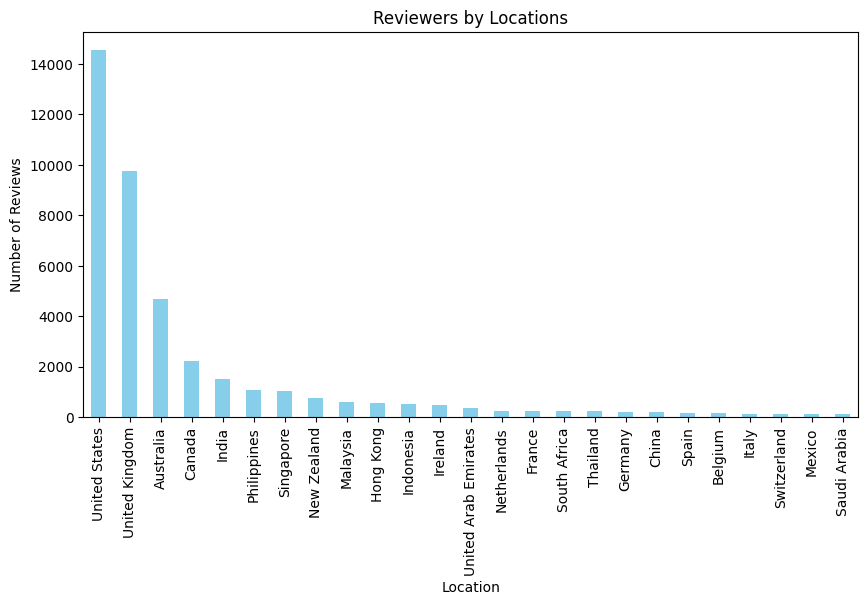

In [18]:
# To get an idea on Top Reviewer Locations
top_reviewer_locations = disneydf['Reviewer_Location'].value_counts().head(25)

plt.figure(figsize=(10,5))
top_reviewer_locations.plot(kind='bar', color='skyblue')

plt.title('Reviewers by Locations')
plt.xlabel('Location')
plt.ylabel('Number of Reviews')
plt.show()

In [19]:
# To get an idea on Reviews based on Disney branches
top_reviewer_locations_bybranch = disneydf.groupby(['Branch','Reviewer_Location']).size().unstack().idxmax()
top_reviewer_locations_bybranch

Reviewer_Location
Afghanistan            Disneyland_HongKong
Albania                   Disneyland_Paris
Algeria                   Disneyland_Paris
Andorra                Disneyland_HongKong
Antigua and Barbuda       Disneyland_Paris
                              ...         
Venezuela              Disneyland_HongKong
Vietnam                Disneyland_HongKong
Zambia                 Disneyland_HongKong
Zimbabwe               Disneyland_HongKong
Åland Islands             Disneyland_Paris
Length: 162, dtype: object

In [20]:
top_reviewer_locations_bybranch.value_counts()

Disneyland_Paris         75
Disneyland_HongKong      49
Disneyland_California    38
dtype: int64

In [21]:
# To understand the distribution of reviews across different branches of Disney.
disneydf['Branch'].value_counts()

Disneyland_California    19400
Disneyland_Paris         13627
Disneyland_HongKong       9607
Name: Branch, dtype: int64

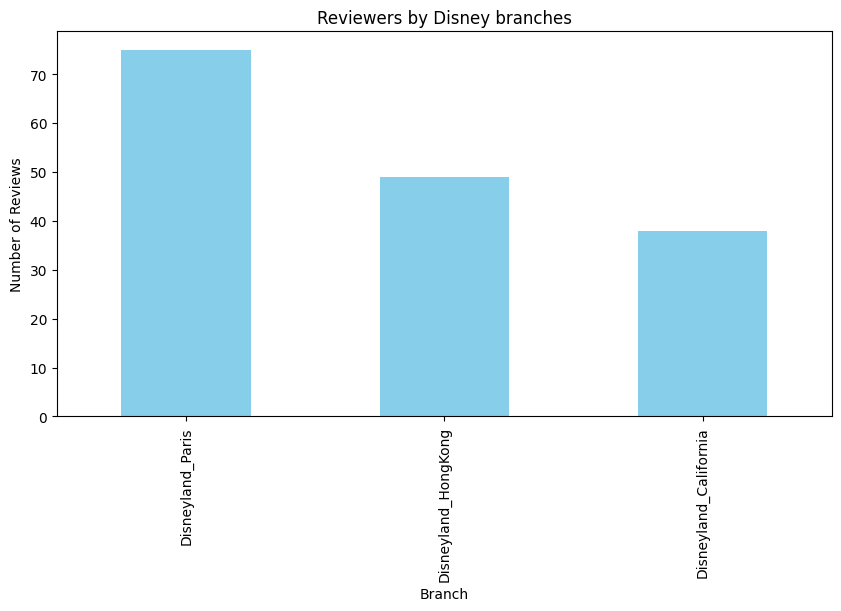

In [22]:
plt.figure(figsize=(10,5))
top_reviewer_locations_bybranch.value_counts().plot(kind='bar', color='skyblue')

plt.title('Reviewers by Disney branches')
plt.xlabel('Branch')
plt.ylabel('Number of Reviews')
plt.show()

<Axes: xlabel='Rating', ylabel='count'>

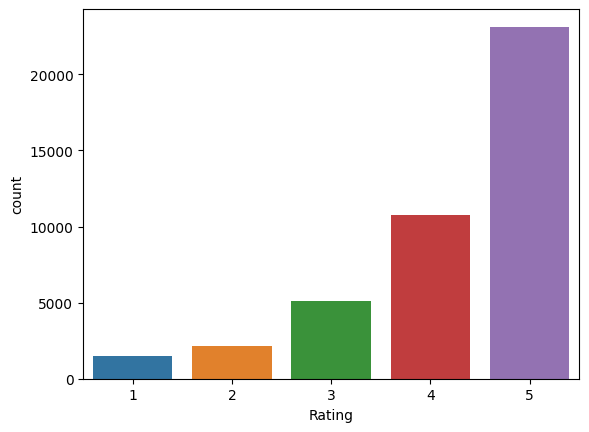

In [23]:
# Distribution of Rating across Disney branches to get to know about customer experiences overall
sns.countplot(data=disneydf,x='Rating')

In [24]:
def rating(rating):
    if rating >= 3:
        return "Positive"
    ##if rating == 3:
    ##    return "Neutral"
    if rating <= 2:
        return "Negative"
    
disneydf['Sentiment'] = disneydf['Rating'].apply(rating)
disneydf

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Sentiment
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,Positive
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,Positive
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,Positive
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,Positive
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,Positive
...,...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris,Positive
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris,Positive
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris,Positive
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris,Positive


In [25]:
branch_byrating= disneydf.groupby(['Branch','Sentiment']).size().unstack()
branch_byrating

Sentiment,Negative,Positive
Branch,,
Disneyland_California,1246,18154
Disneyland_HongKong,508,9099
Disneyland_Paris,1872,11755


In [26]:
# Cumulative distribution of Sentiments are known before creating a balanced dataset
disneydf['Sentiment'].value_counts()

Positive    39008
Negative     3626
Name: Sentiment, dtype: int64

In [27]:
disneydf

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Sentiment
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,Positive
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,Positive
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,Positive
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,Positive
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,Positive
...,...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris,Positive
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris,Positive
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris,Positive
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris,Positive


In [28]:
# Loading the cleaned the dataframe in a CSV file for further use by machine learning and deep learning models 
# for further analysis

disneydf.to_csv(r'C:\Users\priya\Downloads\Projectwork\Cleaned_Disneydf.csv', index=False)

In [29]:
# Trying to read the cleaned CSV file that is loaded in the local drive
cleaned_disneydf = pd.read_csv(r'C:\Users\priya\Downloads\Projectwork\Cleaned_Disneydf.csv')  
cleaned_disneydf

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Sentiment
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,Positive
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,Positive
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,Positive
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,Positive
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,Positive
...,...,...,...,...,...,...,...
42629,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris,Positive
42630,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris,Positive
42631,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris,Positive
42632,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris,Positive
